In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
logfile = "../pytorch_pretrained/models/20e_slid_win_no_feats_r18.log"

In [3]:
epochs = []

with open(logfile) as log:
    while True:
        line = next(log)

        if 'Class Precision and Recall on Test Data' in line:
            line = next(log)
            epoch = dict()
            while len(line) > 1:
                label, p, r = line.split()
                epoch[label] = (float(p[:-1]),float(r[:-1]))

                line = next(log)
            epochs.append(epoch)

StopIteration: 

In [4]:
num_epochs = len(epochs)
print "Gathered data from {} epochs".format(num_epochs)

Gathered data from 20 epochs


In [5]:
pr_dict = defaultdict(list)
rc_dict = defaultdict(list)

for epoch in epochs:
    for label, pr in epoch.iteritems():
        p,r=pr
        
        pr_dict[label].append(p)
        rc_dict[label].append(r)
    

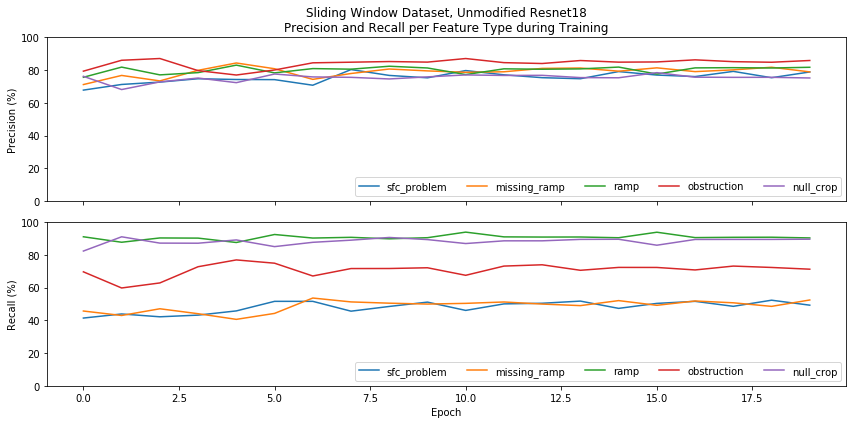

In [12]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,1,1)
for label, ps in pr_dict.iteritems():
    plt.plot(range(num_epochs), ps, label=label)
plt.ylabel('Precision (%)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc='lower right', ncol=5)
plt.title("Sliding Window Dataset, Unmodified Resnet18\n" +
            "Precision and Recall per Feature Type during Training")

ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
for label, rs in rc_dict.iteritems():
    plt.plot(range(num_epochs), rs, label=label)
plt.legend(loc='lower right', ncol=5)
plt.xlabel('Epoch')
plt.ylabel('Recall (%)')

plt.ylim(0,100)

plt.tight_layout()
plt.show()